# Importing the Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

# 2.Data Collection and Processing

In [89]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('CardioVascular.csv')

In [90]:
# print first 5 rows of the dataset
heart_data.head()

,sbp(mm Hg)\tldl(mmol/L)\tadiposity\ttobacco(in Kg)\talcohol\ttypea\tage\tFamHist\tCHD
0,160\t5.73\t23.11\t12\t97.2\t49\t52\t1\tPresent
1,144\t4.41\t28.61\t0.01\t2.06\t55\t63\t0\tPresent
2,118\t3.48\t32.28\t0.08\t3.81\t52\t46\t1\tAbsent
3,170\t6.41\t38.03\t7.5\t24.26\t51\t58\t1\tPresent
4,134\t3.5\t27.78\t13.6\t57.34\t60\t49\t1\tPresent


In [91]:
# print last 5 rows of the dataset
heart_data.tail()

,sbp(mm Hg)\tldl(mmol/L)\tadiposity\ttobacco(in Kg)\talcohol\ttypea\tage\tFamHist\tCHD
457,214\t5.98\t31.72\t0.4\t0\t64\t58\t0\tAbsent
458,182\t4.41\t32.1\t4.2\t18.72\t52\t52\t0\tPresent
459,108\t1.59\t15.23\t3\t26.64\t40\t55\t0\tAbsent
460,118\t11.61\t30.79\t5.4\t23.97\t64\t40\t0\tAbsent
461,132\t4.82\t33.41\t0\t0\t62\t46\t1\tPresent


In [92]:
# number of rows and columns in the dataset
heart_data.shape

(462, 1)

In [93]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 1 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   sbp(mm Hg)	ldl(mmol/L)	adiposity	tobacco(in Kg)	alcohol	typea	age	FamHist	CHD  462 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [94]:
info = ["Systolic Blood Pressure","Cumulative tobacco"," obesity","Accumulation of tabacco","Alcohol Accumulation"," behavior ","Age of person ","Family History","Target value or precense of disease"]



for i in range(len(info)):
    print(heart_data.columns[i]+":\t\t\t"+info[i])

sbp(mm Hg)	ldl(mmol/L)	adiposity	tobacco(in Kg)	alcohol	typea	age	FamHist	CHD:			Systolic Blood Pressure


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
# checking for missing values
heart_data.isnull().sum()

In [ ]:
heart_data["CHD"].describe()


In [95]:
heart_data["CHD"].unique()

KeyError: 'CHD'

### Exploratory Data Analysis (EDA)


In [ ]:
# statistical measures about the data
heart_data.describe()

In [ ]:
heart_data.hist(figsize=(8,8))
plt.show()

In [ ]:
corr = heart_data.drop(columns='CHD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(25, 20))

sns.heatmap(corr, annot=True, mask=mask, ax=ax, cmap="YlGnBu")

plt.show()

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
# checking the distribution of Target Variable
heart_data['CHD'].value_counts()

KeyError: 'CHD'

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='CHD', axis=1)
Y = heart_data['CHD']

In [98]:
print(X)

     sbp(mm Hg)  ldl(mmol/L)  adiposity  tobacco(in Kg)  alcohol  typea  age  \
0           160         5.73      23.11           12.00    97.20     49   52   
1           144         4.41      28.61            0.01     2.06     55   63   
2           118         3.48      32.28            0.08     3.81     52   46   
3           170         6.41      38.03            7.50    24.26     51   58   
4           134         3.50      27.78           13.60    57.34     60   49   
..          ...          ...        ...             ...      ...    ...  ...   
457         214         5.98      31.72            0.40     0.00     64   58   
458         182         4.41      32.10            4.20    18.72     52   52   
459         108         1.59      15.23            3.00    26.64     40   55   
460         118        11.61      30.79            5.40    23.97     64   40   
461         132         4.82      33.41            0.00     0.00     62   46   

     FamHist  
0          1  
1        

In [99]:
print(Y)

0      Present
1      Present
2       Absent
3      Present
4      Present
        ...   
457     Absent
458    Present
459     Absent
460     Absent
461    Present
Name: CHD, Length: 462, dtype: object


#### Splitting the Data into Training data & Test Data

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=10000)

In [101]:
print(X.shape, X_train.shape, X_test.shape)

(462, 8) (369, 8) (93, 8)


### Model Training

# Logistic Regression

In [102]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [103]:
# training the LogisticRegression model with Training data
model.feature_names = list(X.columns)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# Model Evaluation

### Accuracy Score

In [104]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7533875338753387


In [105]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6881720430107527


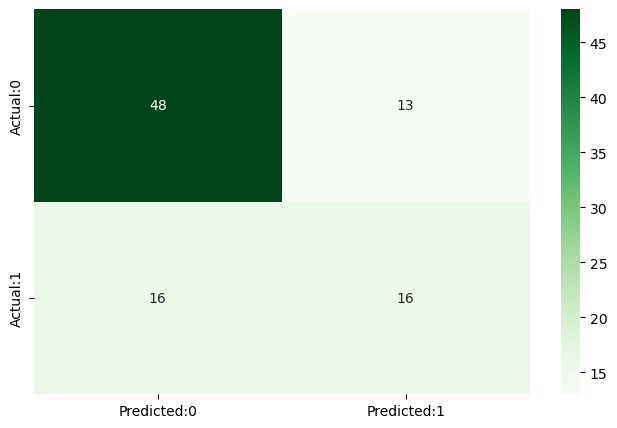

The details for confusion matrix is =
              precision    recall  f1-score   support

      Absent       0.75      0.79      0.77        61
     Present       0.55      0.50      0.52        32

    accuracy                           0.69        93
   macro avg       0.65      0.64      0.65        93
weighted avg       0.68      0.69      0.68        93



In [106]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(Y_test, y_pred))

## Building a Predictive System


In [114]:
#input_data = (sbp,ldl,adiposity,tobacco,alcohol,typea,age,famhist)
input_data = (180,5.1,33,20,12,60,55,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

['Present']
The Person has Heart Disease


In [116]:
res=X_test.copy()
res['actual']=Y_test
res['prediction']=X_test_prediction

res.to_csv('submission.csv',index=False)